Build and evaluate performance of linear regression, kNN (figure out optimal k), boosted tree, random forest and xgboost models for diamond price prediction. Report mean absolute error, RMSE, maximum error for each model.

In [16]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [17]:
diamond_Data = pd.read_csv('diamonds_train.csv')

In [18]:
diamond_Data.head()

,shape,cut,color,clarity,weight_ct,fluorescence,length_width_ratio,polish,symmetry,girdle,cutlet,price,depth,table,length,width,height
0,Emerald,Very Good,D,SI1,1.70,Medium BlueInfo,1.29,Very Good,Very Good,Thin to Very Thick,None,13519,68.1,70.0,7.94,6.17,4.20
1,Round,Ideal,F,IF,1.07,FaintInfo,1.00,Excellent,Excellent,Thin to Slightly Thick,None,8842,62.4,56.0,6.52,6.54,4.07
2,Radiant,Very Good,G,VVS1,1.05,NoneInfo,1.20,Excellent,Excellent,Slightly Thick to Thick,None,4817,71.3,68.0,6.15,5.12,3.65
3,Round,Ideal,E,VVS2,2.85,NoneInfo,1.01,Excellent,Excellent,Medium to Slightly Thick,None,63161,62.7,58.0,9.06,9.00,5.66
4,Round,Ideal,D,SI1,0.35,NoneInfo,1.00,Excellent,Excellent,Medium to Slightly Thick,None,653,59.9,59.0,4.57,4.59,2.74


In [19]:
diamond_Data.describe()

,weight_ct,length_width_ratio,price,depth,table,length,width,height
count,150546.000000,150546.000000,1.505460e+05,150546.000000,150546.000000,150546.000000,150546.000000,150546.000000
mean,0.837971,1.084781,6.386796e+03,63.493332,59.694787,5.604533,5.351345,3.434914
std,0.781406,0.184781,2.502329e+04,3.769779,4.535643,1.457813,1.219303,0.793653
min,0.230000,0.780000,2.460000e+02,4.000000,5.000000,0.000000,0.000000,0.070000
25%,0.400000,1.000000,7.880000e+02,61.500000,57.000000,4.640000,4.480000,2.850000
50%,0.560000,1.010000,1.590000e+03,62.500000,58.000000,5.290000,5.100000,3.210000
75%,1.010000,1.020000,5.106000e+03,64.200000,61.000000,6.440000,6.140000,3.940000
max,20.450000,2.600000,2.641889e+06,80.000000,85.000000,9.990000,9.990000,9.810000


In [20]:
diamond_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150546 entries, 0 to 150545
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   shape               150546 non-null  object 
 1   cut                 150546 non-null  object 
 2   color               150546 non-null  object 
 3   clarity             150546 non-null  object 
 4   weight_ct           150546 non-null  float64
 5   fluorescence        150546 non-null  object 
 6   length_width_ratio  150546 non-null  float64
 7   polish              150546 non-null  object 
 8   symmetry            150546 non-null  object 
 9   girdle              150546 non-null  object 
 10  cutlet              150546 non-null  object 
 11  price               150546 non-null  int64  
 12  depth               150546 non-null  float64
 13  table               150546 non-null  float64
 14  length              150546 non-null  float64
 15  width               150546 non-nul

In [21]:
data_target = diamond_Data['price']

In [22]:
diamond_dummies = pd.get_dummies(diamond_Data)

In [23]:
X = diamond_dummies.drop('price', axis=1)
y = data_target

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [25]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)

In [26]:
xg_reg.fit(X_train,y_train)

pred_y = xg_reg.predict(X_test)

In [27]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [28]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [29]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,23339.304715,555.465838,23580.532618,1327.562554
1,21818.365088,424.053984,22203.324717,1386.267583
2,20483.441250,370.345766,21065.386547,1339.308564
3,19380.907443,381.646700,20045.936466,1403.630261
4,18392.948325,268.356206,19257.803526,1482.353371


In [30]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

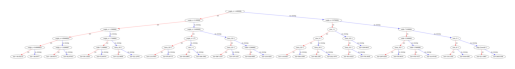

In [31]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=1)
plt.rcParams['figure.figsize'] = [100, 100]
plt.show()

In [32]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score, explained_variance_score

In [34]:
import math

In [35]:
print('XBoost model performance evaluation')
print('R2: ', r2_score(y_test, pred_y))
print('MAE: ', mean_absolute_error(y_test, pred_y))
print('RMSE: ', math.sqrt(mean_squared_error(y_test, pred_y)))
print('Max error: ', max_error(y_test, pred_y))

XBoost model performance evaluation
R2:  0.4435455417065758
MAE:  3789.110601287158
RMSE:  19087.527572743158
Max error:  2397419.5625


Thr R-squared of 0.4435 indicates that 44.35% of the variance is explained by the model. Therefore, some of the variation in the data is explained by the model, but there is still a big amount of data left unexplained by variance. Therefore, this would not be a strong model to use. The MAE indicates that on average, the model's predictions are off by 3789.11. Given that the RMSE od 19087.52, this shows that the model has large errors. The max error of 2397419.56 demonstrates that the largest error of diamond pricing would be off by a big amount. Given the fact that diamonds are very pricey, I would not trust this model to seek for diamond prices.

Boosted Tree

In [36]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [37]:
bt_model = GradientBoostingRegressor(random_state=0)

bt_model.fit(X_train,y_train)

y_pred_bt = bt_model.predict(X_test)

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score, explained_variance_score
import math

In [39]:
print('Boosted model performance evaluation')
print('R2: ', r2_score(y_test, y_pred_bt))
print('MAE: ', mean_absolute_error(y_test, y_pred_bt))
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_pred_bt)))
print('Max error: ', max_error(y_test, y_pred_bt))

Boosted model performance evaluation
R2:  0.8781596292687524
MAE:  1215.4456338866542
RMSE:  8931.62478419877
Max error:  1315872.477556123


The boost model has an R-squared of 0.87.82. Therefore, about 87.82% of the variance of the target variable (price) can be explained by the model. This R-squred is high, meaning that the model provides a good fit to the data. The MAE means that on average, the model's predictions are off by 1215.44. The RMSE of 8931.62 is lower than the previous RMSE value from the previous model, indicating that this model has improved in performance. The max error is 1315872, so the model has made a prediction that was off by this amount at least once in the data.

Random Forest

In [40]:
from sklearn.ensemble import RandomForestRegressor

rf_model  = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_model.fit(X_train,y_train)

y_pred_rf = rf_model.predict(X_test)

In [41]:
print('Random Forest model performance evaluation')
print('R2: ', r2_score(y_test, y_pred_rf))
print('MAE: ', mean_absolute_error(y_test, y_pred_rf))
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_pred_rf)))
print('Max error: ', max_error(y_test, y_pred_rf))

Random Forest model performance evaluation
R2:  0.8782802042988151
MAE:  749.442255696699
RMSE:  8927.204256384373
Max error:  1188747.13


The R-squared for the random forest model is 0.8783, indicating that 87.83% of variance in the price is explained by the model. This is a high r-squared, suggesting that the random forest model provides good fit to the data. The MAE means that on average, the model's predictions are off by 749.44. The RMSE of 8927.20 is relatively low, which indicates good performance of the model. The max error is 1188747, so the model has made a prediction that was off by this amount at least once in the data.




The random forest model and the boost model seem to perform very well. However, the random forest model has a slightly higher r-squared of 87.83%. The random forest model also has a lower MAE, RMSE, and Max error, indicating that it is the better model between the two.

Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lr_model = LinearRegression()

lr_model.fit(X_train,y_train)

LinearRegression()

In [44]:
y_pred_lr = lr_model.predict(X_test)

In [45]:
print('Regression model performance evaluation')
print('R2: ', r2_score(y_test, y_pred_lr))
print('MAE: ', mean_absolute_error(y_test, y_pred_lr))
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_pred_lr)))
print('Max error: ', max_error(y_test, y_pred_lr))

Regression model performance evaluation
R2:  0.6894639633044721
MAE:  4201.686642587895
RMSE:  14259.059039586054
Max error:  1520319.7353689675


The r-squared of 0.6895 indicated that approximately 68.95% of the variance in the target variable is explained by the model. Therefore, the linear regression model provides a moderate fit to the data, but it does not explain as much variance. The MAE is 4201.68, meaning that on average the model's predictions are off by approximately 4201.68. The RMSE of 14259.05 indicates thet there is a larger level of errors since it is much higher. The max error of 1520319.73 indicated that the modle made a predictions that was off by this amount at least once.

KNN

In [46]:
X2 = X
y2=y

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_ = scaler.fit_transform(X2)

X_rescaled = pd.DataFrame(X_, columns=X.columns)

In [48]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_rescaled, y2, test_size=0.3, random_state=1)

In [49]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn.fit(X_train2, y_train2)

KNeighborsRegressor(metric='euclidean')

In [50]:
y_pred_kn = knn.predict(X_test2)

In [51]:
print('KNN model performance evaluation')
print('R2: ', r2_score(y_test2, y_pred_kn))
print('MAE: ', mean_absolute_error(y_test2, y_pred_kn))
print('RMSE: ', math.sqrt(mean_squared_error(y_test2, y_pred_kn)))
print('Max error: ', max_error(y_test2, y_pred_kn))

KNN model performance evaluation
R2:  0.19667313940093278
MAE:  3172.159197591002
RMSE:  22934.063389280913
Max error:  2545611.6


The KNN model has an r-squared of 0.1966, meaning that 19.66% of the variance in the price is explained by the model. Therefore, this is a weak model that doesn't explain much of the data. Of all the model created, this seems to be the worse model of them all. Therefore, this model should not be used because it would not provide much useful information.

I tried to optimize for optimal K. However, I was having trouble doing so.

The model that was the best fit for all the data seems to be the Random forest model.

The R-squared for the random forest model is 0.8783, indicating that 87.83% of variance in the price is explained by the model. This is a high r-squared, suggesting that the random forest model provides good fit to the data. The MAE means that on average, the model's predictions are off by 749.44. The RMSE of 8927.20 is relatively low, which indicates good performance of the model. The max error is 1188747, so the model has made a prediction that was off by this amount at least once in the data.

The random forest model and the boost model seem to perform very well. However, the random forest model has a slightly higher r-squared of 87.83%. The random forest model also has a lower MAE, RMSE, and Max error, indicating that it is the better model between the two.

I would use the random forest model if I were thinking of purchasing a diamond because it is the strongest model of all the models that were evaluated. However, one concern is that the max error, although lower than the max error of the bossted model, is still a very large amount.